In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# data = [
#     "System is down, need urgent support",
#     "Unable to login to the account",
#     "Critical bug in the payment gateway",
#     "Forgot password, need help resetting it",
#     "Error in the application during checkout",
#     "Account is locked, need to unlock immediately",
#     "Can you help me change my account email?",
#     "Issue with the app crashing on startup"
# ]

In [10]:
df = pd.read_csv('csv/processed_tickets_en.csv')
df.shape

(1564, 5)

In [17]:
df.sample(5)

,processed_text,type,queue,priority,urgency
1335,Support needed for HP DeskJet 3755 paper jams....,Problem,Product Support,medium,not_urgent
269,Urgent: Ticket System Errors. Dear IT Services...,Incident,Technical Support,high,urgent
515,Assistance for Starting Problems. Dear Custome...,Request,Product Support,medium,not_urgent
1278,Surface Pro 7 battery and overheating issues. ...,Incident,Product Support,high,urgent
383,Urgent: Connection problems with Cisco Router ...,Incident,Technical Support,high,urgent


In [13]:
# Step 1: Convert the text data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['processed_text'])

In [14]:
# Step 2: Apply K-Means Clustering (assuming 2 clusters for 'Urgent' and 'Non-Urgent')
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [15]:
# Step 3: Assign each ticket to a cluster
labels = kmeans.labels_

# Step 4: Visualize the clusters (optional - using PCA to reduce to 2D for visualization)
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

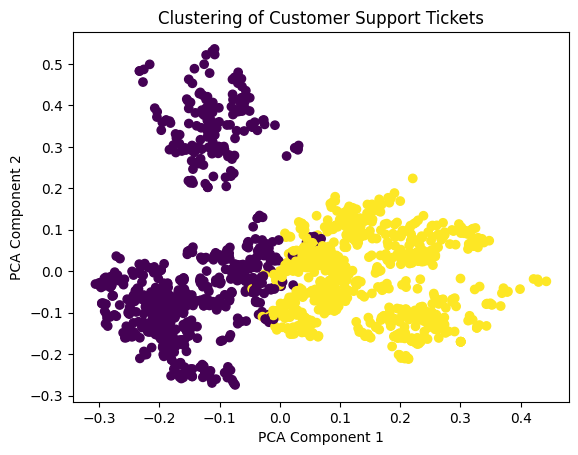

Silhouette Score: 0.025020729643162196

Cluster Centroids (Feature Terms):
Cluster 0:
Top terms: ['issue', 'router', 'network', 'printer', 'issues']

Cluster 1:
Top terms: ['aws', 'service', 'management', 'server', 'team']



In [16]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.title("Clustering of Customer Support Tickets")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Step 5: Evaluate the clustering performance (Silhouette Score)
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

# # Step 6: Display the ticket descriptions with their assigned clusters
# df = pd.DataFrame({'Ticket Description': data, 'Cluster': labels})
# print("\nClustered Tickets:")
# print(df)

# Optional: Inspect the centroids to understand the clusters better
print("\nCluster Centroids (Feature Terms):")
terms = vectorizer.get_feature_names_out()
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}:")
    top_terms_idx = centroid.argsort()[-5:][::-1]  # Get top 5 terms
    top_terms = [terms[idx] for idx in top_terms_idx]
    print("Top terms:", top_terms)
    print()